**Вероятностное распределение данных**

Вероятностное распределение данных - это математическая модель, которая описывает, как вероятности распределены между различными значениями переменных в наборе данных. Вероятностное распределение может быть как дискретным, так и непрерывным, и определяет вероятности того, что определенные значения переменных будут наблюдаться в выборке.

Существует множество различных типов вероятностных распределений данных, которые могут использоваться для моделирования различных типов данных. Например, нормальное распределение может использоваться для моделирования непрерывных переменных, таких как рост или вес, а распределение Бернулли - для моделирования бинарных переменных, таких как пол или результат эксперимента.

В контексте машинного обучения существуют два основных типа моделей вероятностного распределения данных: дискриминативные и генеративные.

Дискриминативная модель - это модель, которая прямо моделирует условное распределение вероятности целевой переменной Y, имея в виду некоторый вход X. Она оценивает вероятность P(Y|X) и используется для решения задач классификации или регрессии.

Генеративная модель, в отличие от дискриминативной, моделирует совместное распределение вероятностей всех переменных - как целевых, так и входных. Она оценивает вероятность P(X,Y) и может использоваться для генерации новых данных.

**Дискриминативная модель**

Модели, которые моделируют p(y|x), то есть ищут некое приближение для истинного p(y|x), называют дискриминативными моделями. 

Примером дискриминативной модели является логистическая регрессия. Вот простой пример, демонстрирующий, как использовать логистическую регрессию для классификации ирисов: В этом примере мы загружаем набор данных ирисов и разделяем его на обучающую и тестовую выборки. Затем мы создаем объект логистической регрессии и обучаем модель на обучающей выборке. Мы используем обученную модель для предсказания меток классов на тестовой выборке и оцениваем точность модели.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Загрузка набора данных ирисов
iris = load_iris()

# Разделение набора данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

# Создание объекта логистической регрессии
model = LogisticRegression()

# Обучение модели на обучающей выборке
model.fit(X_train, y_train)

# Предсказание меток классов на тестовой выборке
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = model.score(X_test, y_test)
print('Точность модели: {:.2f}'.format(accuracy))

Точность модели: 0.93


**Генеративная модель**

Генеративные модели - это класс моделей машинного обучения, которые позволяют генерировать новые данные, имитируя статистические свойства обучающего набора данных. Также, можно сказать что это модели, которые моделируют распределение для всех используемых переменных, то есть p(x, y), либо p(x), если y отсутствует.

В этом примере генеративная модель используется для генерации изображений цифр от 0 до 9, похожих на те, что содержатся в наборе данных MNIST.
Процесс обучения модели состоит из двух этапов. Сначала обучается дискриминатор - модель, которая классифицирует изображения как реальные (из набора MNIST) или сгенерированные (созданные генератором). После того, как дискриминатор обучен, обучается генератор - модель, которая генерирует синтетические изображения цифр на основе случайных входных данных. Задача генератора - минимизировать ошибку дискриминатора. Другими словами, генератор пытается создать такие изображения, которые были бы "убедительны" для дискриминатора и могли бы быть отнесены к реальным. Таким образом, в конце обучения генератор создает изображения, которые могут быть схожи с теми, что содержатся в наборе MNIST, но при этом являются уникальными и не встречались в исходном наборе данных. Это может быть полезно для различных задач, например, для генерации новых примеров данных для обучения моделей классификации.

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

Epoch 1/10
469/469 [==============================] - 105s 219ms/step - loss: 0.2088 - val_loss: 0.1379
Epoch 2/10
469/469 [==============================] - 111s 237ms/step - loss: 0.1216 - val_loss: 0.1088
Epoch 3/10
469/469 [==============================] - 104s 222ms/step - loss: 0.1047 - val_loss: 0.0989
Epoch 4/10
469/469 [==============================] - 105s 223ms/step - loss: 0.0966 - val_loss: 0.0939
Epoch 5/10
469/469 [==============================] - 107s 229ms/step - loss: 0.0919 - val_loss: 0.0898
Epoch 6/10
469/469 [==============================] - 102s 218ms/step - loss: 0.0887 - val_loss: 0.0872
Epoch 7/10
469/469 [==============================] - 103s 220ms/step - loss: 0.0862 - val_loss: 0.0847
Epoch 8/10
469/469 [==============================] - 103s 219ms/step - loss: 0.0843 - val_loss: 0.0833
Epoch 9/10
469/469 [==============================] - 102s 219ms/step - loss: 0.0829 - val_loss: 0.0824
Epoch 10/10
469/469 [==============================] - 102s 218m

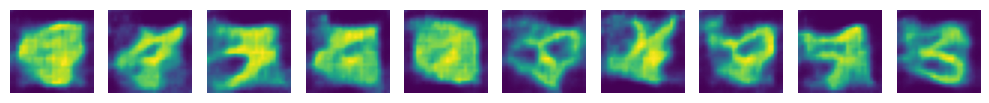

In [ ]:
# Загрузка данных
(x_train, _), (x_test, _) = mnist.load_data()

# Нормализация данных
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Подготовка данных
input_shape = (28, 28, 1)
x_train = np.reshape(x_train, (len(x_train), input_shape[0], input_shape[1], input_shape[2]))
x_test = np.reshape(x_test, (len(x_test), input_shape[0], input_shape[1], input_shape[2]))

# Определение архитектуры автокодировщика
encoder = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=input_shape),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
])

decoder = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(32,)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(7*7*64, activation='relu'),
  tf.keras.layers.Reshape((7, 7, 64)),
  tf.keras.layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same', strides=2),
  tf.keras.layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same', strides=2),
  tf.keras.layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same'),
])

# Создание автокодировщика
autoencoder = tf.keras.models.Sequential([encoder, decoder])

# Компиляция модели
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Обучение модели на данных MNIST
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

# Генерация изображений
num_images = 10
random_input = tf.random.normal([num_images, 32])
generated_images = decoder(random_input)

# Отображение сгенерированных изображений
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(tf.squeeze(generated_images[i]))
    plt.axis('off')
plt.tight_layout()
plt.show()